In [1]:
# Import packages
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import numpy as np
import json
import os
import socket 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
%load_ext dotenv
%dotenv ../../.env

In [3]:
con = create_engine(os.getenv('EDM_DATA'))

In [4]:
# Specify latest PLUTO version
pluto = 'dcp_pluto."19v2_wo_corrections"'
# Specify previous PLUTO version or the one you want to compare to
plutoprev = 'dcp_pluto."19v1"'

condition = ''

In [5]:
sql = '''
SELECT
    count(*) as total,
    sum(case when a.borough is null then 1 else 0 end) as borough,
    sum(case when a.block is null then 1 else 0 end) as block,
    sum(case when a.lot is null then 1 else 0 end) as lot,
    sum(case when a.cd is null then 1 else 0 end) as cd,
    sum(case when a.ct2010 is null then 1 else 0 end) as ct2010,
    sum(case when a.cb2010 is null then 1 else 0 end) as cb2010,
    sum(case when a.schooldist is null then 1 else 0 end) as schooldist,
    sum(case when a.council is null then 1 else 0 end) as council,
    sum(case when a.zipcode is null then 1 else 0 end) as zipcode,
    sum(case when a.firecomp is null then 1 else 0 end) as firecomp,
    sum(case when a.policeprct is null then 1 else 0 end) as policeprct,
    sum(case when a.healtharea is null then 1 else 0 end) as healtharea,
    sum(case when a.sanitboro is null then 1 else 0 end) as sanitboro,
    sum(case when a.sanitsub is null then 1 else 0 end) as sanitsub,
    sum(case when a.address is null then 1 else 0 end) as address,
    sum(case when a.zonedist1 is null then 1 else 0 end) as zonedist1,
    sum(case when a.zonedist2 is null then 1 else 0 end) as zonedist2,
    sum(case when a.zonedist3 is null then 1 else 0 end) as zonedist3,
    sum(case when a.zonedist4 is null then 1 else 0 end) as zonedist4,
    sum(case when a.overlay1 is null then 1 else 0 end) as overlay1,
    sum(case when a.overlay2 is null then 1 else 0 end) as overlay2,
    sum(case when a.spdist1 is null then 1 else 0 end) as spdist1,
    sum(case when a.spdist2 is null then 1 else 0 end) as spdist2,
    sum(case when a.spdist3 is null then 1 else 0 end) as spdist3,
    sum(case when a.ltdheight is null then 1 else 0 end) as ltdheight,
    sum(case when a.splitzone is null then 1 else 0 end) as splitzone,
    sum(case when a.bldgclass is null then 1 else 0 end) as bldgclass,
    sum(case when a.landuse is null then 1 else 0 end) as landuse,
    sum(case when a.easements is null then 1 else 0 end) as easements,
    sum(case when a.ownertype is null then 1 else 0 end) as ownertype,
    sum(case when a.ownername is null then 1 else 0 end) as ownername,
    sum(case when a.lotarea is null then 1 else 0 end) as lotarea,
    sum(case when a.bldgarea is null then 1 else 0 end) as bldgarea,
    sum(case when a.comarea is null then 1 else 0 end) as comarea,
    sum(case when a.resarea is null then 1 else 0 end) as resarea,
    sum(case when a.officearea is null then 1 else 0 end) as officearea,
    sum(case when a.retailarea is null then 1 else 0 end) as retailarea,
    sum(case when a.garagearea is null then 1 else 0 end) as garagearea,
    sum(case when a.strgearea is null then 1 else 0 end) as strgearea,
    sum(case when a.factryarea is null then 1 else 0 end) as factryarea,
    sum(case when a.otherarea is null then 1 else 0 end) as otherarea,
    sum(case when a.areasource is null then 1 else 0 end) as areasource,
    sum(case when a.numbldgs is null then 1 else 0 end) as numbldgs,
    sum(case when a.numfloors is null then 1 else 0 end) as numfloors,
    sum(case when a.unitsres is null then 1 else 0 end) as unitsres,
    sum(case when a.unitstotal is null then 1 else 0 end) as unitstotal,
    sum(case when a.lotfront is null then 1 else 0 end) as lotfront,
    sum(case when a.lotdepth is null then 1 else 0 end) as lotdepth,
    sum(case when a.bldgfront is null then 1 else 0 end) as bldgfront,
    sum(case when a.bldgdepth is null then 1 else 0 end) as bldgdepth,
    sum(case when a.ext is null then 1 else 0 end) as ext,
    sum(case when a.proxcode is null then 1 else 0 end) as proxcode,
    sum(case when a.irrlotcode is null then 1 else 0 end) as irrlotcode,
    sum(case when a.lottype is null then 1 else 0 end) as lottype,
    sum(case when a.bsmtcode is null then 1 else 0 end) as bsmtcode,
    sum(case when a.assessland is null then 1 else 0 end) as assessland,
    sum(case when a.assesstot is null then 1 else 0 end) as assesstot,
    sum(case when a.exempttot is null then 1 else 0 end) as exempttot,
    sum(case when a.yearbuilt is null then 1 else 0 end) as yearbuilt,
    sum(case when a.yearalter1 is null then 1 else 0 end) as yearalter1,
    sum(case when a.yearalter2 is null then 1 else 0 end) as yearalter2,
    sum(case when a.histdist is null then 1 else 0 end) as histdist,
    sum(case when a.landmark is null then 1 else 0 end) as landmark,
    sum(case when a.builtfar is null then 1 else 0 end) as builtfar,
    sum(case when a.residfar is null then 1 else 0 end) as residfar,
    sum(case when a.commfar is null then 1 else 0 end) as commfar,
    sum(case when a.facilfar is null then 1 else 0 end) as facilfar,
    sum(case when a.borocode is null then 1 else 0 end) as borocode,
    sum(case when a.bbl is null then 1 else 0 end) as bbl,
    sum(case when a.condono is null then 1 else 0 end) as condono,
    sum(case when a.tract2010 is null then 1 else 0 end) as tract2010,
    sum(case when a.xcoord is null then 1 else 0 end) as xcoord,
    sum(case when a.ycoord is null then 1 else 0 end) as ycoord,
    sum(case when a.zonemap is null then 1 else 0 end) as zonemap,
    sum(case when a.zmcode is null then 1 else 0 end) as zmcode,
    sum(case when a.sanborn is null then 1 else 0 end) as sanborn,
    sum(case when a.taxmap is null then 1 else 0 end) as taxmap,
    sum(case when a.edesignum is null then 1 else 0 end) as edesignum,
    sum(case when a.appbbl is null then 1 else 0 end) as appbbl,
    sum(case when a.appdate is null then 1 else 0 end) as appdate,
    sum(case when a.plutomapid is null then 1 else 0 end) as plutomapid,
    sum(case when a.version is null then 1 else 0 end) as version,
    sum(case when a.sanitdistrict is null then 1 else 0 end) as sanitdistrict,
    sum(case when a.healthcenterdistrict is null then 1 else 0 end) as healthcenterdistrict,
    sum(case when a.firm07_flag is null then 1 else 0 end) as firm07_flag,
    sum(case when a.pfirm15_flag is null then 1 else 0 end) as pfirm15_flag,
    sum(case when a.rpaddate is null then 1 else 0 end) as rpaddate,
    sum(case when a.dcasdate is null then 1 else 0 end) as dcasdate,
    sum(case when a.zoningdate is null then 1 else 0 end) as zoningdate,
    sum(case when a.landmkdate is null then 1 else 0 end) as landmkdate,
    sum(case when a.basempdate is null then 1 else 0 end) as basempdate,
    sum(case when a.masdate is null then 1 else 0 end) as masdate,
    sum(case when a.polidate is null then 1 else 0 end) as polidate,
    sum(case when a.edesigdate is null then 1 else 0 end) as edesigdate
FROM {} a
INNER JOIN {} b 
USING(bbl)
{}
'''

In [6]:
df = pd.read_sql(sql=sql.format(pluto, plutoprev, condition), con=con)
df_prev = pd.read_sql(sql=sql.format(plutoprev, pluto, condition), con=con)

In [7]:
df

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,858407,0,0,0,1273,1273,1273,1988,1274,1999,2005,1995,1994,2186,2306,363,1677,838595,858203,858394,783638,858241,756733,858329,858407,855371,1677,363,2794,363,827322,411,389,371,48704,48704,48704,48704,48704,48704,48704,48704,363,389,389,363,363,389,389,389,389,57558,363,363,363,363,363,363,363,363,363,363,827514,856967,2810,363,363,363,0,0,849933,1273,1406,1406,1522,842786,1167,1167,858407,766275,766275,0,0,2186,1994,823729,792713,0,0,0,0,0,858407,858407,0


In [8]:
df_prev

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,858407,0,0,0,1154,577,1154,1872,1155,20605,1892,1879,1878,2074,2194,473,1491,838585,858203,858394,783612,858241,756691,858329,858407,855371,1491,473,2916,473,827368,521,499,491,48740,48740,48740,48740,48740,48740,48740,48740,473,499,499,473,473,499,499,499,499,57617,473,473,473,473,473,473,473,473,473,473,827514,856967,3172,473,473,473,0,0,849933,577,1291,1291,1336,842783,1052,1052,849043,766664,766664,0,0,2074,1878,823712,792695,0,0,0,0,0,858407,858407,0


In [9]:
summary = pd.concat([df_prev,df], sort=False)
summary.index = ['19v1', '19v2_beta']
summary_pct = summary.iloc[:, :-1].pct_change()

In [10]:
summary_pct

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate
19v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19v2_beta,0.0,NaN,NaN,NaN,0.10312,1.206239,0.10312,0.061966,0.10303,-0.902985,0.059725,0.061735,0.061768,0.054002,0.051048,-0.232558,0.124748,0.000012,0.0,0.0,0.000033,0.0,0.000056,0.0,0.0,0.0,0.124748,-0.232558,-0.041838,-0.232558,-0.000056,-0.211132,-0.220441,-0.244399,-0.000739,-0.000739,-0.000739,-0.000739,-0.000739,-0.000739,-0.000739,-0.000739,-0.232558,-0.220441,-0.220441,-0.232558,-0.232558,-0.220441,-0.220441,-0.220441,-0.220441,-0.001024,-0.232558,-0.232558,-0.232558,-0.232558,-0.232558,-0.232558,-0.232558,-0.232558,-0.232558,-0.232558,0.0,0.0,-0.114124,-0.232558,-0.232558,-0.232558,NaN,NaN,0.0,1.206239,0.089078,0.089078,0.139222,0.000004,0.109316,0.109316,0.011029,-0.000507,-0.000507,NaN,NaN,0.054002,0.061768,0.000021,0.000023,NaN,NaN,NaN,NaN,NaN,0.0,0.0


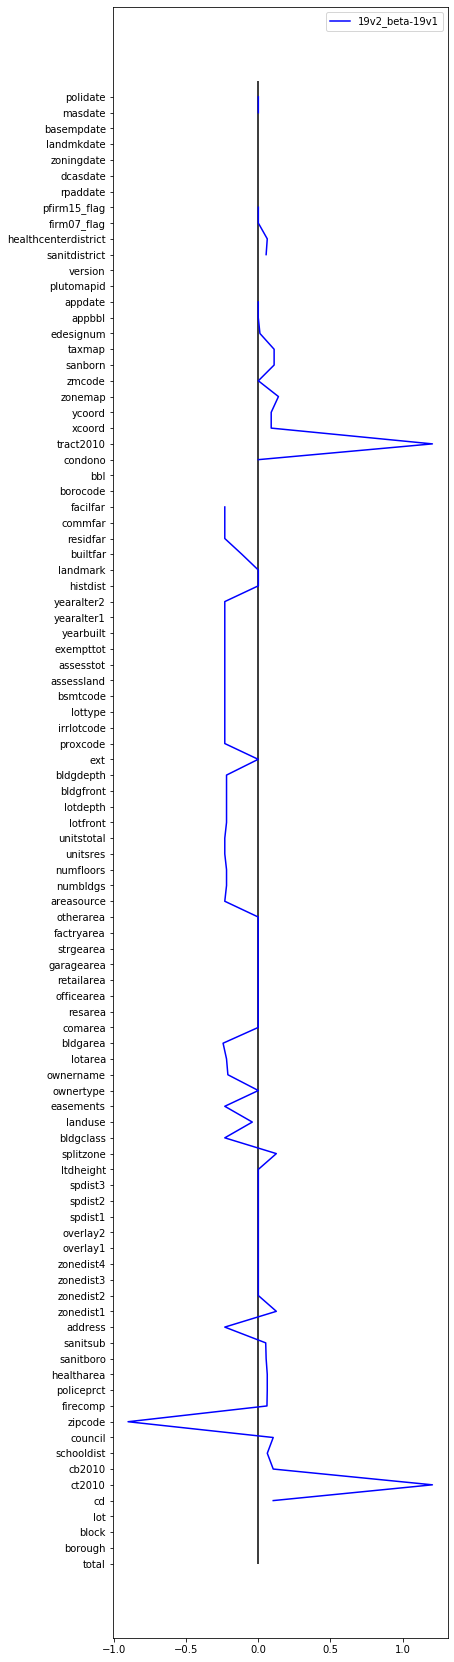

In [11]:
plt.figure(figsize=(6, 30))

difference1 = summary_pct.loc['19v2_beta',:]
num_col = len(summary_pct.columns)
plt.plot(difference1, range(num_col), label = '19v2_beta-19v1', color = 'blue')
plt.vlines(0, 0, num_col) #0 reference line

for i in range(num_col):
    if abs(difference1[i]) >= 10000:
        plt.text(x = difference1[i] , y = i - 0.15, s = '{}'.format(difference1[i]), size = 10, color = 'blue')
    else: 
        pass
    
plt.yticks(range(num_col), summary_pct.columns, rotation='horizontal')
# plt.title('19v1-18v2.1 Null 0 Counts Comparison')
plt.legend()
plt.show()

## Condo

In [12]:
condition_condo = "WHERE right(bbl, 4) LIKE '75%%'"
df = pd.read_sql(sql=sql.format(pluto, plutoprev, condition_condo), con=con)
df_prev = pd.read_sql(sql=sql.format(plutoprev, pluto, condition_condo), con=con)

In [13]:
df

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,8475,0,0,0,9,9,9,9,9,9,9,9,9,9,17,0,57,7794,8459,8473,7188,8468,6972,8470,8475,8364,57,0,15,0,8366,0,0,8,15,15,15,15,15,15,15,15,0,0,0,0,0,0,0,0,0,8439,0,0,0,0,0,0,0,0,0,0,7435,8391,104,0,0,0,0,0,1,9,13,13,57,8212,9,9,8475,159,159,0,0,9,9,8004,7726,0,0,0,0,0,8475,8475,0


In [14]:
df_prev

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,8475,0,0,0,72,0,72,72,72,74,72,72,72,72,80,0,56,7794,8459,8473,7187,8468,6973,8470,8475,8364,56,0,79,0,8302,0,0,18,79,79,79,79,79,79,79,79,0,0,0,0,0,0,0,0,0,8401,0,0,0,0,0,0,0,0,0,0,7435,8391,28,0,0,0,0,0,1,0,76,76,56,8212,72,72,8282,159,159,0,0,72,72,8004,7726,0,0,0,0,0,8475,8475,0


In [15]:
summary = pd.concat([df_prev,df], sort=False)
summary.index = ['19v1', '19v2_beta']
summary_pct = summary.iloc[:, :-1].pct_change()

In [16]:
summary_pct

,total,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,policeprct,healtharea,sanitboro,sanitsub,address,zonedist1,zonedist2,zonedist3,zonedist4,overlay1,overlay2,spdist1,spdist2,spdist3,ltdheight,splitzone,bldgclass,landuse,easements,ownertype,ownername,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,areasource,numbldgs,numfloors,unitsres,unitstotal,lotfront,lotdepth,bldgfront,bldgdepth,ext,proxcode,irrlotcode,lottype,bsmtcode,assessland,assesstot,exempttot,yearbuilt,yearalter1,yearalter2,histdist,landmark,builtfar,residfar,commfar,facilfar,borocode,bbl,condono,tract2010,xcoord,ycoord,zonemap,zmcode,sanborn,taxmap,edesignum,appbbl,appdate,plutomapid,version,sanitdistrict,healthcenterdistrict,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate
19v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19v2_beta,0.0,NaN,NaN,NaN,-0.875,inf,-0.875,-0.875,-0.875,-0.878378,-0.875,-0.875,-0.875,-0.875,-0.7875,NaN,0.017857,0.0,0.0,0.0,0.000139,0.0,-0.000143,0.0,0.0,0.0,0.017857,NaN,-0.810127,NaN,0.007709,NaN,NaN,-0.555556,-0.810127,-0.810127,-0.810127,-0.810127,-0.810127,-0.810127,-0.810127,-0.810127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.714286,NaN,NaN,NaN,NaN,NaN,0.0,inf,-0.828947,-0.828947,0.017857,0.0,-0.875,-0.875,0.023304,0.0,0.0,NaN,NaN,-0.875,-0.875,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


posx and posy should be finite values
posx and posy should be finite values
/opt/conda/lib/python3.7/site-packages/matplotlib/transforms.py:399: RuntimeWarning: invalid value encountered in double_scalars
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values


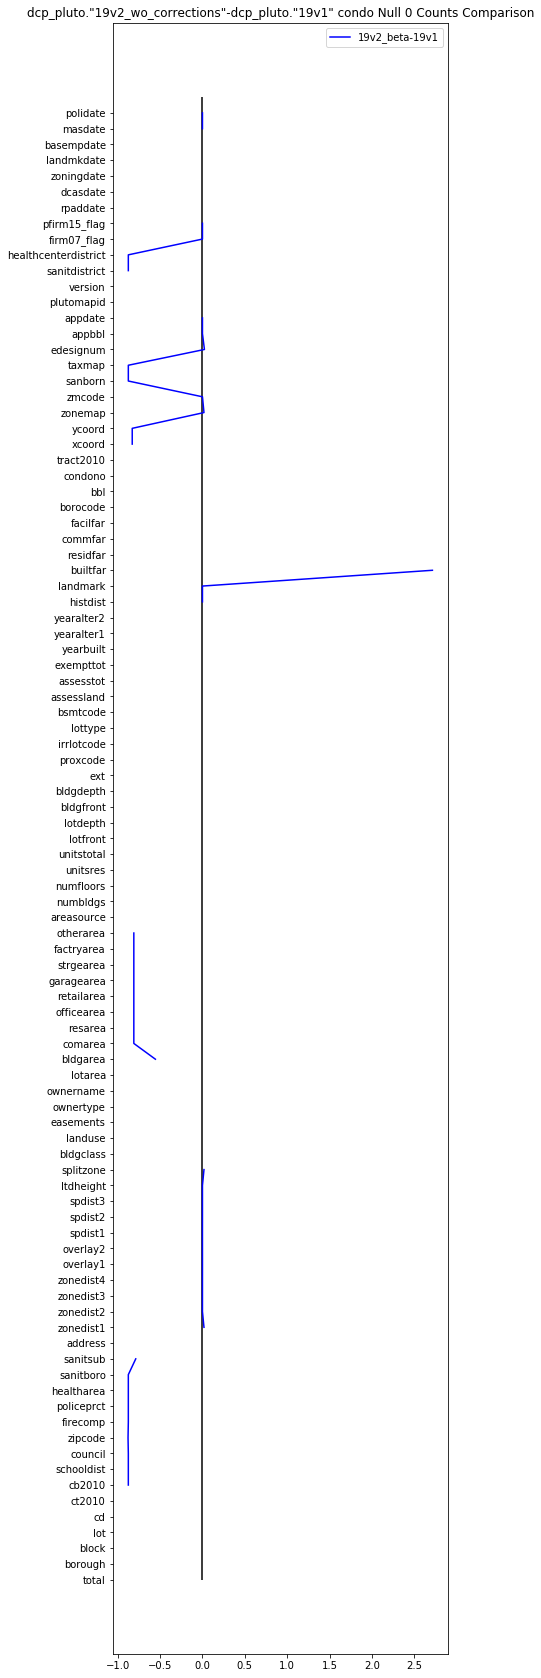

In [17]:
plt.figure(figsize=(6, 30))

difference1 = summary_pct.loc['19v2_beta',:]
num_col = len(summary_pct.columns)
plt.plot(difference1, range(num_col), label = '19v2_beta-19v1', color = 'blue')
plt.vlines(0, 0, num_col) #0 reference line

for i in range(num_col):
    if abs(difference1[i]) >= 10000:
        plt.text(x = difference1[i] , y = i - 0.15, s = '{}'.format(difference1[i]), size = 10, color = 'blue')
    else: 
        pass
    
plt.yticks(range(num_col), summary_pct.columns, rotation='horizontal')
plt.title(f'{pluto}-{plutoprev} condo Null 0 Counts Comparison')
plt.legend()
plt.show()